## What is the likelihood that Diviner has observed a glowing hot crater?

In [1]:
import planets
import numpy as np
import matplotlib.pyplot as plt
import planetRad as rad
%matplotlib inline

## A simplified probability model
Assume hot crater and ejecta are detectable for a finite lifetime $\Delta t$, and that there is a minimum size hot spot detectable by thermal emission, $A_\textrm{min}$. We assume $A_\textrm{min} \sim D_\textrm{min}^2$, i.e. hot spot area comparable to the crater area.

The area on the Moon's surface observed by Diviner during typical hot spot lifetime is $v_\textrm{sc} w \Delta t$, where $w$ is the swath width and $v_\textrm{sc}$ is the spacecraft velocity. The number of craters with  formed within Diviner swath during the typical hot spot lifetime is:

$$N = n(D_\textrm{min})v_\textrm{sc}w\Delta t^2$$

where $n(D)$ is the cumulative number of craters larger than $D$ per unit area, per unit time. Note that the swath width is related to the spacecraft altitude $z_\textrm{sc}$ by $w = M\theta_x z_\textrm{sc}$, where $M$ and $\theta_x$ are the number of detectors and their angular fields-of-view in the cross-track direction.
The average time between detections is

$$\tilde{t} \sim \frac{\Delta t}{N} = \frac{1}{n(D_\textrm{min})v_\textrm{sc}w\Delta t}$$

We assume these events are random and independent, and can therefore be modeled by a Poisson distribution. In this case, the probability of one or more detections during an observation period $t_\textrm{obs}$ is

$$P(t_\textrm{obs}, \ge 1) = 1 - e^{-t_\textrm{obs}/\tilde{t}} = 1 - e^{-N t_\textrm{obs}/\Delta t} $$

We assume that detections can only be made on the nightside, so $t_\textrm{obs} \approx \frac{1}{2}t_\textrm{LRO}$, where $t_\textrm{LRO}$ is the total mission duration ($\sim$8 yr, as of 2017).

### Estimating $D_\textrm{min}$
If we assume the heated material is initially isothermal at a temperature $T_\textrm{hot}$, then its effect on the measured radiance is

$$R' =  x\left[B_i(T_\textrm{hot}) - B_i(T_0)\right] \approx x B_i(T_\textrm{hot})$$

where $B_i(T)$ is the blackbody radiance in channel $i$, $T_0$ is the temperature of the background, and $x = D^2/A_\textrm{iFOV}$ is the fractional area of the hot spot relative to the detector field of view, $A_\textrm{iFOV} = z_\textrm{sc}^2 \theta_x \theta_y$, with angular field of view $\theta_x \times \theta_y$. For a confident detection, we need a signal-to-noise ratio of $C = R'/\delta R$, where $\delta R$ is the noise-equivalent radiance in the particular spectral channel. This implies

$$D_\textrm{min} \sim \left[ \frac{C\delta R}{B_i(T_\textrm{hot}) - B_i(T_0)} z_\textrm{sc}^2 \theta_x \theta_y \right]^{\frac{1}{2}} 
\approx \left[ \frac{C\delta R}{B_i(T_\textrm{hot})} z_\textrm{sc}^2 \theta_x \theta_y \right]^{\frac{1}{2}}$$

where the approximation is valid in the case where $T_\textrm{hot} \gg T_0$.

### Estimating $\Delta t$
Hot spots are assumed to cool by radiation to space. In this case, the lifetime of a hot spot is determined by its internal heat energy and surface temperature $T$. We assume a fraction $f$ of the impact energy $E_0 = \frac{4}{3}\pi r^3 \rho v^2$ is partitioned to heating inside the crater. We further assume that the crater diameter is approximated by [e.g., $\textit{Williams et al., 2017}$] $r \sim D/40$ for impact velocities $v \sim$ 10-20 km/s. Then, the heat energy per unit area is

$$e_h = \frac{fE_0}{\pi D^2} = f'D\rho v^2$$

where $f' \equiv 2.1\times 10^{-5}f$, and $e_h$ is in units of J m$^{-2}$. The radiative cooling time for the hot spot is approximated by

$$\Delta t = \frac{e_h}{\sigma T^4} = \frac{f'D\rho v^2}{\sigma T^4}$$

In reality, the surface temperature of the hot spot decreases through time, $T = T(t)$. Therefore, using a constant temperature may lead to errors, but a conservative choice is $T \equiv T_\textrm{hot}$. This would underestimate the lifetime $\Delta t$.

### Estimating $n(D_\textrm{min})$

Impact fluxes have been estimated by various methods, as summarized by <i>Williams et al.</i> (2017). 


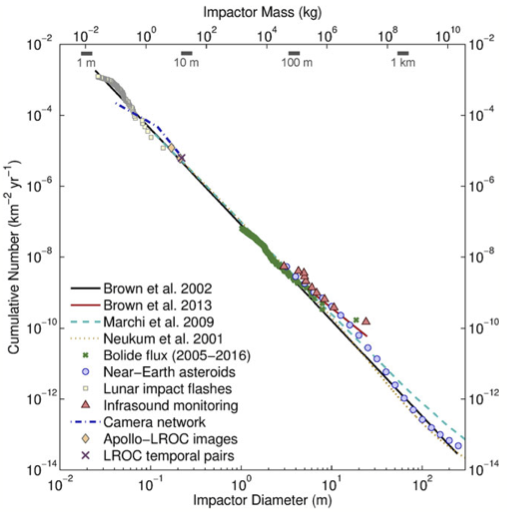

In [64]:
from IPython.display import Image
Image(filename='/Users/phayne/research/collaborators/WilliamsJP/impact_flux/Figure_impactors_CSC.png')

From the image above, we approximate a power-law relation for the cumulative distribution of impact crater size (gray boxes):

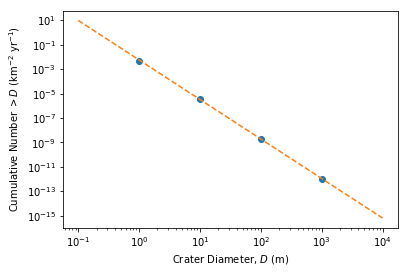

In [15]:
D = np.power(10,np.arange(0,4)) # Modeled crater diameters
CDF = [5e-3,4e-6,2e-9,1e-12] # Cumulative number [km-2.yr-1]
pfit = np.polyfit(np.log10(D),np.log10(CDF),1) # Power-law fit
Drange = np.power(10, np.linspace(-1,4,100))
Cfit = np.power(10, np.polyval(pfit, np.log10(Drange)))
plt.loglog(D, CDF, 'o')
plt.loglog(Drange, Cfit, '--')
plt.xlabel('Crater Diameter, $D$ (m)')
plt.ylabel('Cumulative Number $>D$ (km$^{-2}$ yr$^{-1}$)')
plt.show()

In [50]:
# Instrument/spacecraft parameters
C = 10.0 #SNR for detection
NETD = 1.0 #Noise-equivalent temperature difference [K]
lam = 18.0e-6 #Wavelength [m]
M = 21 #Number of cross-track detectors
theta_x = 3.6e-3 #Angular iFOV -- cross-track [rad]
theta_y = 6.1e-3 #Angular iFOV -- in-track [rad]
Z_sc = 80.0e3 #Spacecraft altitude [m]
AiFOV = theta_x*theta_y*Z_sc**2 #Area of detector iFOV on surface [m2]
W = theta_x*M*Z_sc #Cross-track swath width [m]
V_sc = np.sqrt(planets.Moon.g * (planets.Moon.R + Z_sc)) #Orbital velocity [m.s-1]

In [51]:
# Constants
T_0 = 100.0 #Nighttime temperature [K]
T_hot = 650.0 #Hot spot temperature [K]
f = 0.1 #Fraction of impact energy partitioned to heating the crater
vi = 17.5e3 #Impactor velocity [m.s-1]
rhoi = 3000.0 #Impactor density [kg.m-3]

In [52]:
# Radiometric quantities
deltaR = rad.planck(T_0 + NETD, lam) - rad.planck(T_0, lam) #Noise-equivalent spectral radiance [W.m-2.sr-1.m-1]
B_hot = rad.planck(T_hot, lam) #Spectral radiance of hot spot

In [53]:
# Minimum detectable crater size [m]
D_min = np.sqrt( C*deltaR/B_hot * Z_sc**2 * theta_x * theta_y )

In [54]:
# Minimum hot spot lifetime [s]
fp = f * (4/3)*40**-3
e_h = fp * D_min * rhoi * vi**2
Deltat = e_h / (rad.sigma*T_hot**4)

In [55]:
# Number of impacts larger than D_min
nkmyr = 10**(np.polyval(pfit, np.log10(D_min))) # [km-2.yr-1]
n = nkmyr * 1e-6 / (np.pi*1e7) # [m-2.s-1]

In [56]:
N = 0.5 * n * V_sc * W * Deltat**2

In [57]:
print("Minimum crater diameter: {:.2f} meters".format(D_min))
print("Lifetime of hot spot: {:.1f} hr".format(Deltat/3600))
print("Probability of detection of single event: {:.4g}".format(N))
print("Expected time between detections: {:.1f} yr".format(Deltat/N/(np.pi*1e7)))

Minimum crater diameter: 9.73 meters
Lifetime of hot spot: 0.5 hr
Probability of detection of single event: 2.025e-06
Expected time between detections: 28.9 yr


In [58]:
# Observation time
LROYEARS = 8.0
t_obs = 0.5 * (LROYEARS * np.pi*1e7)

In [59]:
# Probability of occurrence
P = 1 - np.exp(-N*t_obs/Deltat)

In [60]:
print("Probability of detection during whole {:0.0f}-year mission: {:.1f}%".format(LROYEARS, P*100))

Probability of detection during whole 8-year mission: 12.9%
